# EEG Eyes open/closed prediction
*Bobby, Arwa, Simi, Victoria*

Link to [dataset](https://physionet.org/content/eegmmidb/1.0.0/)

## Abstract
This data set consists of over 1500 one- and two-minute EEG recordings, obtained from 109 volunteers, as described below.

Experimental Protocol
Subjects performed different motor/imagery tasks while 64-channel EEG were recorded using the BCI2000 system (http://www.bci2000.org). Each subject performed 14 experimental runs: two one-minute baseline runs (one with eyes open, one with eyes closed), and three two-minute runs of each of the four following tasks:

We are just using the first two tasks for binary classification. The aim is just to get to grips with some deep learning frameworks, comparing an CNN implementation to XGBoost, based on some lovely Kaggle notebooks:
- [XGBoost Implementation](https://www.kaggle.com/code/yorkyong/exploring-eeg-a-beginner-s-guide/notebook)
- [CNN Implementation](https://www.kaggle.com/code/banggiangle/cnn-eeg-pytorch)

In [55]:
import mne
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Read all EDF files from the './data' directory


data_dir = './data'
raw_list = []

for filename in os.listdir(data_dir):
    if filename.endswith('.edf'):
        edf_file = os.path.join(data_dir, filename)
        raw = mne.io.read_raw_edf(edf_file, preload=True)
        raw_list.append(raw)

raw_list[0]


Extracting EDF parameters from /Users/myco/Documents/01 work/eeg-hackathon/data/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


Measurement date,"August 12, 2009 16:15:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,160.00 Hz
Highpass,0.00 Hz
Lowpass,80.00 Hz


Shape of the data: (64, 9760)
Number of channels: 64
Time series length: 9760
Sampling frequency: 160.0 Hz


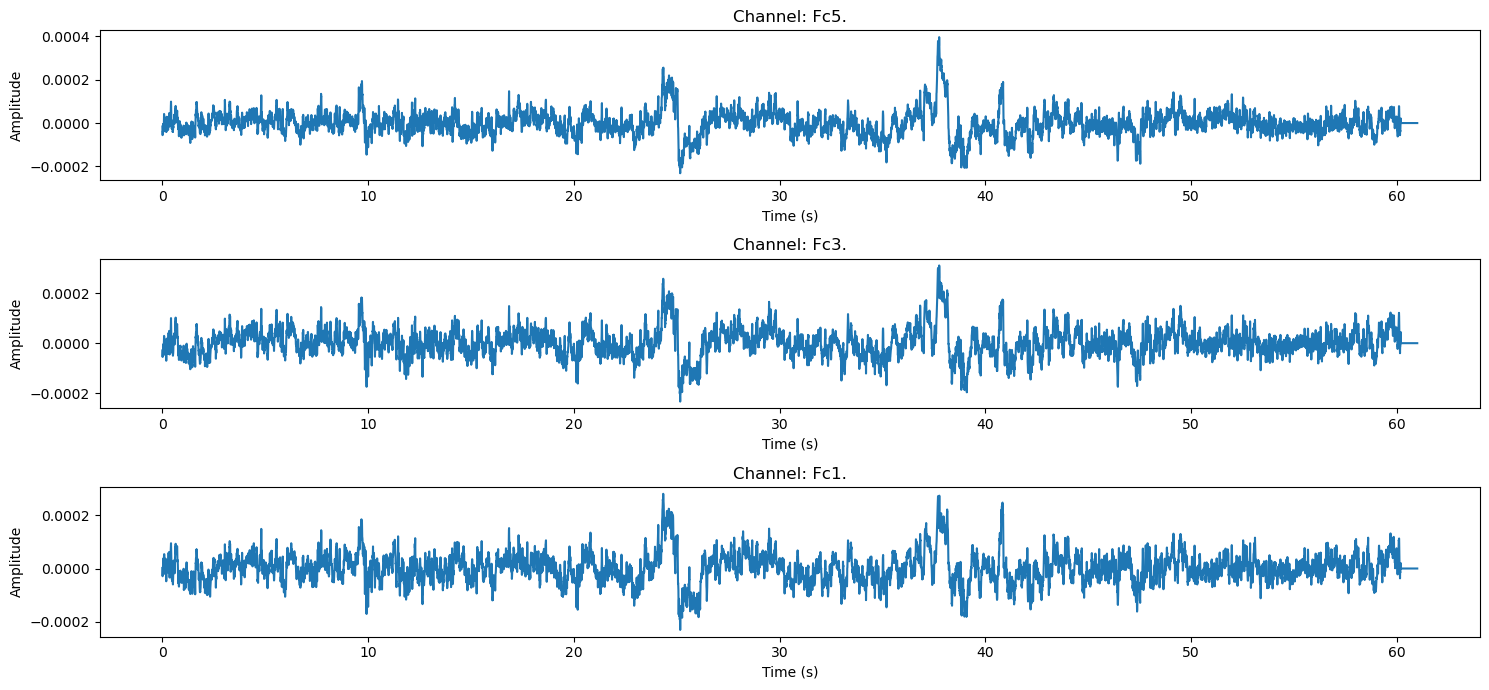

In [58]:
# Select a single subject (e.g., the first one)
single_subject_raw = raw_list[0]

# Extract the time series data
data, times = single_subject_raw.get_data(return_times=True)

# Get channel names
channel_names = single_subject_raw.ch_names

# Print some information about the extracted data
print(f"Shape of the data: {data.shape}")
print(f"Number of channels: {len(channel_names)}")
print(f"Time series length: {len(times)}")
print(f"Sampling frequency: {single_subject_raw.info['sfreq']} Hz")

# Optionally, you can plot the first few channels
fig, axs = plt.subplots(3, 1, figsize=(15, 7))
for i in range(3):
    axs[i].plot(times, data[i])
    axs[i].set_title(f"Channel: {channel_names[i]}")
    axs[i].set_xlabel("Time (s)")
    axs[i].set_ylabel("Amplitude")
plt.tight_layout()
plt.show()



Effective window size : 12.800 (s)


In [61]:
# Extract frequency bands for each subject

import numpy as np
from mne.time_frequency import compute_psd

# Define frequency bands
freq_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 80)
}

# Function to extract frequency band power
def extract_band_power(data, sfreq, band):
    psds, freqs = compute_psd(data, sfreq=sfreq, fmin=band[0], fmax=band[1], n_fft=2048)
    band_power = np.mean(psds, axis=-1)
    return band_power

# Extract frequency band power for each subject
band_powers = {band: [] for band in freq_bands}

for raw in raw_list:
    data = raw.get_data()
    sfreq = raw.info['sfreq']
    for band, (fmin, fmax) in freq_bands.items():
        band_power = extract_band_power(data, sfreq, (fmin, fmax))
        band_powers[band].append(band_power)

# Print the extracted band powers for the first subject
for band, powers in band_powers.items():
    print(f"{band.capitalize()} band power for first subject: {powers[0]}")



ImportError: cannot import name 'compute_psd' from 'mne.time_frequency' (/Users/myco/miniconda3/lib/python3.12/site-packages/mne/time_frequency/__init__.py)

In [ ]:
"""
dat -> subjects x features matrix

for sub in subjects:
    open the file
    convert to a dataframe
    extract features!
    dat[sub]=features
    add column for label

do more stuff

"""

In [ ]:
import re

ses = re.search(f"(?:\w{5})([0-9]{2}.edf)")